### importing libraries

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing data

In [182]:
df=pd.read_csv("drugeffects.csv",index_col=0)

In [183]:
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [184]:
df.shape

(3107, 5)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   urlDrugName    3107 non-null   object
 1   rating         3107 non-null   int64 
 2   effectiveness  3107 non-null   object
 3   condition      3106 non-null   object
 4   sideEffects    3107 non-null   object
dtypes: int64(1), object(4)
memory usage: 145.6+ KB


### checking missing values and found that only 1 missing value present

In [186]:
df.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [187]:
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

In [189]:
df['condition'].value_counts().head(10)

depression             237
acne                   165
anxiety                 63
insomnia                54
birth control           49
high blood pressure     42
allergies               37
acid reflux             33
asthma                  33
migraines               31
Name: condition, dtype: int64

In [161]:
df.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

### Major  drugs

In [162]:
df['urlDrugName'].value_counts()

lexapro       63
prozac        46
retin-a       45
zoloft        45
paxil         38
              ..
arimidex       1
elocon         1
clobetasol     1
aloprim        1
ortho-evra     1
Name: urlDrugName, Length: 502, dtype: int64

### looking unique values of important columns

In [163]:
df['urlDrugName'].nunique()

502

In [164]:
df['condition'].nunique()

1426

In [165]:
df['sideEffects'].value_counts()

Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

### Data visualization

In [166]:
value=df['sideEffects'].value_counts()
# sizes=value[:10]
series=pd.DataFrame(value)
#series['sideEffects']=series.index
series.rename(columns={'sideEffects': 'Frequency'},inplace=True)
series

,Frequency
Mild Side Effects,1019
No Side Effects,930
Moderate Side Effects,614
Severe Side Effects,369
Extremely Severe Side Effects,175


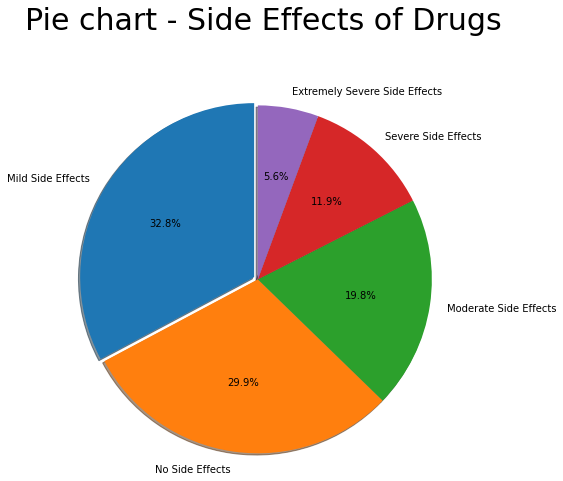

In [177]:
explode = (0.05,0,0,0,0) 
fig1, ax1 = plt.subplots()
ax1.pie(series['Frequency'], labels=series.index,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90,radius=2)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Pie chart - Side Effects of Drugs', x=0.525, y=1.45, ha='center', fontsize=30)
# plt.title( "Side Effects of Drugs" , size = 5 ) 
plt.show()

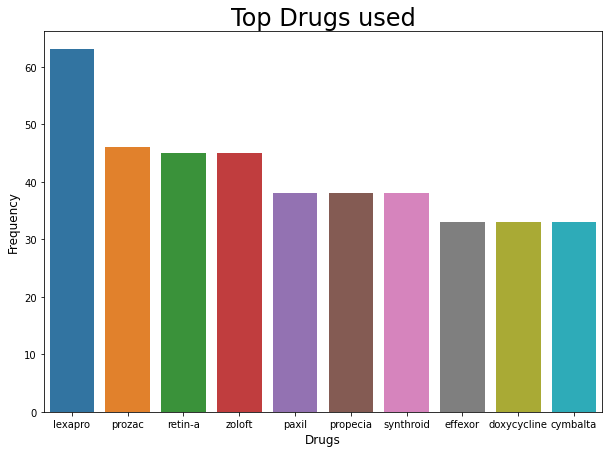

In [178]:
val=df['urlDrugName'].value_counts().head(10)
# sizes=value[:10]
series=pd.DataFrame(val)
#series['sideEffects']=series.index
series.rename(columns={'urlDrugName': 'Frequency'},inplace=True)
fig, ax = plt.subplots(figsize=(10,7))
# Set label for x-axis 
ax.set_xlabel( "Drugs" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "Frequency" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "Top Drugs used" , size = 24 ) 
sns.barplot(x=series.index,y=series['Frequency'],data=series)

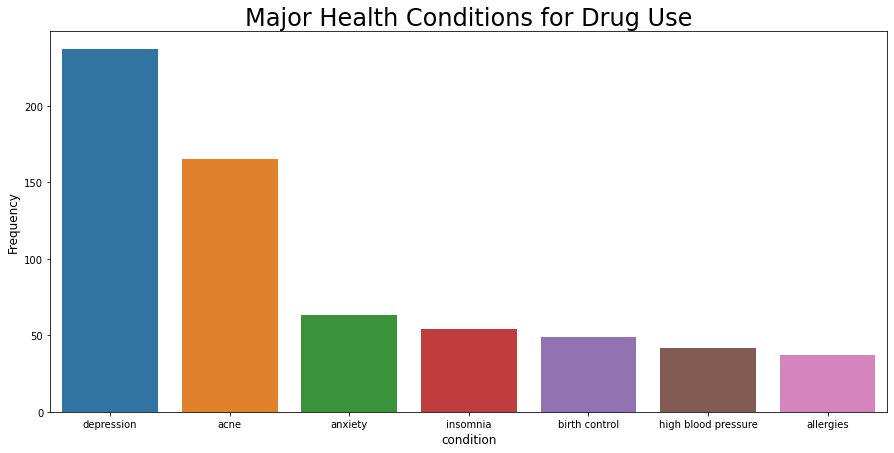

In [180]:
val=df['condition'].value_counts().head(7)
# sizes=value[:10]
series=pd.DataFrame(val)
#series['sideEffects']=series.index
series.rename(columns={'condition': 'Frequency'},inplace=True)
fig, ax = plt.subplots(figsize=(15,7))
# Set label for x-axis 
ax.set_xlabel( "condition" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "Frequency" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "Major Health Conditions for Drug Use" , size = 24 ) 
sns.barplot(x=series.index,y=series['Frequency'],data=series)

Text(0, 0.5, 'Frequency')

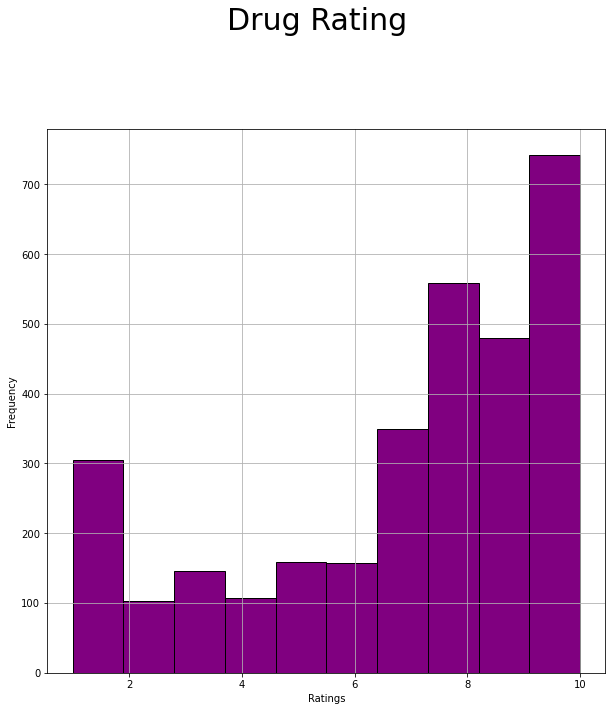

In [154]:
plt.figure(figsize=(10,10))
df['rating'].hist(bins=10,ec='k',color='purple', edgecolor='black')
# plt.title('Drug Rating',size=10)
plt.suptitle('Drug Rating', x=0.5, y=1.05, ha='center', fontsize=30)
plt.xlabel("Ratings")
plt.ylabel("Frequency")

### label encoding all columns with mapping

In [12]:
cols=['urlDrugName','effectiveness','condition','sideEffects']

In [13]:
from sklearn.preprocessing import LabelEncoder
mappings=list()
labelencoder=LabelEncoder()
for x in cols:
    df[x]=labelencoder.fit_transform(df[x])
    mappings_dict={index:label for index, label in enumerate(labelencoder.classes_)}
    mappings.append(mappings_dict)

In [14]:
mappings

[{0: 'abilify',
  1: 'accolate',
  2: 'accupril',
  3: 'accutane',
  4: 'aciphex',
  5: 'actiq',
  6: 'actonel',
  7: 'actos',
  8: 'acyclovir',
  9: 'aczone',
  10: 'adcirca',
  11: 'adderall',
  12: 'adderall-xr',
  13: 'adipex-p',
  14: 'advair-diskus',
  15: 'advair-hfa',
  16: 'albuterol',
  17: 'aldactone',
  18: 'aldara',
  19: 'alendronate',
  20: 'alesse',
  21: 'allegra',
  22: 'allegra-d',
  23: 'aloprim',
  24: 'alprazolam',
  25: 'ambien',
  26: 'ambien-cr',
  27: 'amerge',
  28: 'amitiza',
  29: 'amoxil',
  30: 'amphetamine',
  31: 'ampicillin',
  32: 'anafranil',
  33: 'androgel',
  34: 'angeliq',
  35: 'antivert',
  36: 'aralen',
  37: 'arava',
  38: 'aricept',
  39: 'arimidex',
  40: 'armour-thyroid',
  41: 'aromasin',
  42: 'arthrotec',
  43: 'asacol',
  44: 'asmanex',
  45: 'atacand',
  46: 'atarax',
  47: 'atenolol',
  48: 'ativan',
  49: 'atripla',
  50: 'augmentin',
  51: 'avage',
  52: 'avapro',
  53: 'avelox',
  54: 'avita',
  55: 'avodart',
  56: 'axert',
  57:

### Checking Correlation

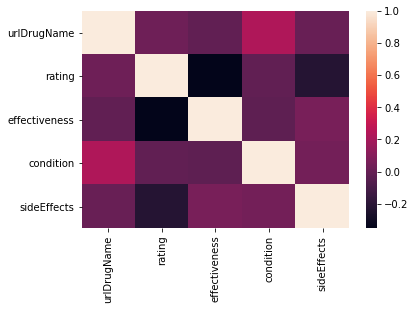

In [132]:
corr=df.corr()
sns.heatmap(corr)

### Selecting Dependent and independent values

In [133]:
x=df.drop('sideEffects',axis=1)
y=df['sideEffects']

In [134]:
x.head()

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


### Standard scaling the data

In [135]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [137]:
# dtale.show(x)

## Data modeling

In [138]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Logistic regression

In [139]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

In [140]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.44      0.66      0.53       298
           1       0.38      0.40      0.39       115
           2       0.58      0.45      0.51       301
           3       0.38      0.22      0.28        50
           4       0.42      0.24      0.31       169

    accuracy                           0.46       933
   macro avg       0.44      0.39      0.40       933
weighted avg       0.47      0.46      0.45       933



### Gussian Naive Bayes Classifier

In [25]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [26]:
y_pred=classifier.predict(X_test)
print('Classification report :\n' ,classification_report(y_test,y_pred))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.34      0.36      0.35        50
            Mild Side Effects       0.45      0.68      0.54       298
        Moderate Side Effects       0.43      0.27      0.33       169
              No Side Effects       0.56      0.38      0.45       301
          Severe Side Effects       0.37      0.37      0.37       115

                     accuracy                           0.45       933
                    macro avg       0.43      0.41      0.41       933
                 weighted avg       0.47      0.45      0.44       933



**Bernouli Naive Bayes Classifier**

In [27]:
classifier=BernoulliNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("classification report : \n",classification_report(y_test,y_pred))

classification report : 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.00      0.00      0.00        50
            Mild Side Effects       0.29      0.54      0.38       298
        Moderate Side Effects       0.00      0.00      0.00       169
              No Side Effects       0.44      0.55      0.49       301
          Severe Side Effects       0.00      0.00      0.00       115

                     accuracy                           0.35       933
                    macro avg       0.15      0.22      0.17       933
                 weighted avg       0.24      0.35      0.28       933



C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**

**Linear SVM**

In [28]:
classifier=SVC(kernel="linear",random_state=123)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.00      0.00      0.00        50
            Mild Side Effects       0.43      0.69      0.53       298
        Moderate Side Effects       0.41      0.20      0.27       169
              No Side Effects       0.56      0.39      0.46       301
          Severe Side Effects       0.39      0.57      0.46       115

                     accuracy                           0.45       933
                    macro avg       0.36      0.37      0.34       933
                 weighted avg       0.44      0.45      0.42       933



C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**POLYNOMIAL SVM**

In [29]:
svm_po=SVC(kernel='poly',degree=3,random_state=123)
svm_po.fit(X_train,y_train)
y_pred=svm_po.predict(X_test)
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.00      0.00      0.00        50
            Mild Side Effects       0.32      0.91      0.47       298
        Moderate Side Effects       0.00      0.00      0.00       169
              No Side Effects       0.38      0.12      0.18       301
          Severe Side Effects       0.00      0.00      0.00       115

                     accuracy                           0.33       933
                    macro avg       0.14      0.21      0.13       933
                 weighted avg       0.23      0.33      0.21       933



C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Radial SVM**

In [30]:
svm_ra=SVC(kernel='rbf',random_state=123)
svm_ra.fit(X_train,y_train)
y_pred=svm_ra.predict(X_test)
print("Classification report \n",classification_report(y_test,y_pred))

Classification report 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.00      0.00      0.00        50
            Mild Side Effects       0.33      0.80      0.47       298
        Moderate Side Effects       0.00      0.00      0.00       169
              No Side Effects       0.40      0.29      0.34       301
          Severe Side Effects       0.00      0.00      0.00       115

                     accuracy                           0.35       933
                    macro avg       0.15      0.22      0.16       933
                 weighted avg       0.23      0.35      0.26       933



C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN algorithm**

In [31]:
acc_values=[]
neighbors=np.arange(1,16)
for i in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

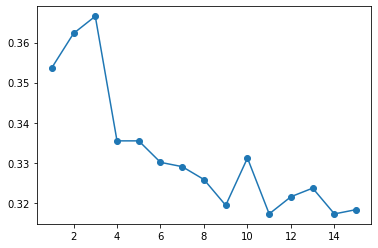

In [32]:
plt.plot(range(1,16),acc_values,'-o')
plt.show()

In [41]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Classification report\n",classification_report(y_test,y_pred))

Classification report
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.12      0.22      0.16        50
            Mild Side Effects       0.39      0.61      0.48       298
        Moderate Side Effects       0.25      0.20      0.22       169
              No Side Effects       0.47      0.34      0.40       301
          Severe Side Effects       0.40      0.10      0.17       115

                     accuracy                           0.37       933
                    macro avg       0.33      0.30      0.28       933
                 weighted avg       0.38      0.37      0.35       933



**Decision Tree**

In [145]:
clf=DecisionTreeClassifier(random_state=123)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Classification report: \n",classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.39      0.42      0.41       298
           1       0.32      0.30      0.31       115
           2       0.50      0.46      0.47       301
           3       0.39      0.48      0.43        50
           4       0.30      0.31      0.31       169

    accuracy                           0.40       933
   macro avg       0.38      0.39      0.39       933
weighted avg       0.40      0.40      0.40       933



In [146]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=123,min_samples_split=30,max_depth=300)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Classification matrix: \n",classification_report(y_test,y_pred))

Classification matrix: 
               precision    recall  f1-score   support

           0       0.45      0.61      0.52       298
           1       0.41      0.32      0.36       115
           2       0.56      0.47      0.51       301
           3       0.56      0.58      0.57        50
           4       0.37      0.31      0.34       169

    accuracy                           0.47       933
   macro avg       0.47      0.46      0.46       933
weighted avg       0.47      0.47      0.47       933



**Random forest Classifier**

In [147]:
rf=RandomForestClassifier(random_state=123)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Classification report : \n",classification_report(y_test,y_pred))

Classification report : 
               precision    recall  f1-score   support

           0       0.43      0.45      0.44       298
           1       0.34      0.30      0.31       115
           2       0.55      0.52      0.53       301
           3       0.44      0.50      0.47        50
           4       0.32      0.34      0.33       169

    accuracy                           0.44       933
   macro avg       0.41      0.42      0.42       933
weighted avg       0.44      0.44      0.44       933



### **Gradient Boosting**

In [211]:
classifier=GradientBoostingClassifier(random_state=123,n_estimators =58,min_samples_split=0.07)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.52      0.62      0.56       298
           1       0.43      0.37      0.40       115
           2       0.65      0.58      0.61       301
           3       0.45      0.66      0.53        50
           4       0.41      0.32      0.36       169

    accuracy                           0.53       933
   macro avg       0.49      0.51      0.49       933
weighted avg       0.53      0.53      0.52       933



### Evaluating using kFold Crossvalidation

In [214]:
seed = 123
num_trees = 58

In [215]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=7, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed,min_samples_split=0.07)
results = model_selection.cross_val_score(model, x, y, cv=kfold)

C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [216]:
print(results.mean())

0.4959748526339948


**Xg Boost**

In [38]:
xgbc=XGBClassifier(random_state=123)
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_test)
print("Classification report : \n",classification_report(y_test,y_pred))

C:\Users\Vinay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:55:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report : 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.45      0.52      0.48        50
            Mild Side Effects       0.48      0.53      0.51       298
        Moderate Side Effects       0.38      0.36      0.37       169
              No Side Effects       0.59      0.57      0.58       301
          Severe Side Effects       0.34      0.29      0.31       115

                     accuracy                           0.48       933
                    macro avg       0.45      0.45      0.45       933
                 weighted avg       0.48      0.48      0.48       933



### Extra Tree Classifier

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100,max_features=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Classification report \n",classification_report(y_test,y_pred))

Classification report 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.37      0.44      0.40        50
            Mild Side Effects       0.43      0.46      0.45       298
        Moderate Side Effects       0.34      0.33      0.33       169
              No Side Effects       0.56      0.53      0.55       301
          Severe Side Effects       0.33      0.29      0.31       115

                     accuracy                           0.44       933
                    macro avg       0.40      0.41      0.41       933
                 weighted avg       0.44      0.44      0.44       933



### AdaBoost Classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=123)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Classification report \n",classification_report(y_test,y_pred))

Classification report 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.41      0.52      0.46        50
            Mild Side Effects       0.44      0.63      0.52       298
        Moderate Side Effects       0.38      0.30      0.34       169
              No Side Effects       0.61      0.41      0.49       301
          Severe Side Effects       0.34      0.33      0.34       115

                     accuracy                           0.46       933
                    macro avg       0.44      0.44      0.43       933
                 weighted avg       0.47      0.46      0.45       933

